In [1]:
import pandas as pd

In [2]:
# Load user data
users = pd.read_csv('../data/raw/BX-Users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

# Load books data
books = pd.read_csv('../data/raw/BX-Books.csv', sep=';', error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

# Load ratings data
ratings = pd.read_csv('../data/raw/BX-Book-Ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
D:\Program Files\anaconda3\envs\book-recommendation-system\lib\site-packag

### Handling Missing Values and Data Formatting

In [3]:
# Find the books with missing 'bookAuthor' information
missing_authors = books[books['bookAuthor'].isnull()]

# Assuming you found that the book with missing 'bookAuthor' was written by 'Author Name'
books.at[missing_authors.index, 'bookAuthor'] = 'Larissa Anne Downes'

# Find the books with missing 'publisher' information
missing_publishers = books[books['publisher'].isnull()]

# Assuming you found that the books with missing 'publisher' were published by 'Publisher Name' and 'Publisher Name 2'
books.at[missing_publishers.index[0], 'publisher'] = 'NovelBooks Incorporated'
books.at[missing_publishers.index[1], 'publisher'] = 'Random House Publishing Group'

print(books.loc[missing_authors.index])
print(books.loc[missing_publishers.index])

              ISBN                                          bookTitle  \
187689  9627982032  The Credit Suisse Guide to Managing Your Perso...   

                 bookAuthor yearOfPublication                       publisher  \
187689  Larissa Anne Downes              1995  Edinburgh Financial Publishing   

                                                imageUrlS  \
187689  http://images.amazon.com/images/P/9627982032.0...   

                                                imageUrlM  \
187689  http://images.amazon.com/images/P/9627982032.0...   

                                                imageUrlL  
187689  http://images.amazon.com/images/P/9627982032.0...  
              ISBN        bookTitle       bookAuthor yearOfPublication  \
128890  193169656X      Tyrant Moon  Elaine Corvidae              2002   
129037  1931696993  Finders Keepers  Linnea Sinclair              2001   

                            publisher  \
128890        NovelBooks Incorporated   
129037  Random Hous

In [4]:
# Drop the 'Age' column from the Users dataframe
users = users.drop(columns='Age')
users.columns

Index(['userID', 'Location'], dtype='object')

In [32]:
print("Data types for the Users dataframe:")
print(users.dtypes)

print("\nData types for the Books dataframe:")
print(books.dtypes)

print("\nData types for the Ratings dataframe:")
print(ratings.dtypes)

Data types for the Users dataframe:
userID       int64
Location    object
dtype: object

Data types for the Books dataframe:
ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int32
publisher            object
imageUrlS            object
imageUrlM            object
imageUrlL            object
dtype: object

Data types for the Ratings dataframe:
userID         int64
ISBN          object
bookRating     int64
dtype: object


In [6]:
print("Unique values in 'yearOfPublication' column:")
print(books['yearOfPublication'].unique())

Unique values in 'yearOfPublication' column:
[2002 2001 1991 1999 2000 1993 1996 1988 2004 1998 1994 2003 1997 1983
 1979 1995 1982 1985 1992 1986 1978 1980 1952 1987 1990 1981 1989 1984 0
 1968 1961 1958 1974 1976 1971 1977 1975 1965 1941 1970 1962 1973 1972
 1960 1966 1920 1956 1959 1953 1951 1942 1963 1964 1969 1954 1950 1967
 2005 1957 1940 1937 1955 1946 1936 1930 2011 1925 1948 1943 1947 1945
 1923 2020 1939 1926 1938 2030 1911 1904 1949 1932 1928 1929 1927 1931
 1914 2050 1934 1910 1933 1902 1924 1921 1900 2038 2026 1944 1917 1901
 2010 1908 1906 1935 1806 2021 '2000' '1995' '1999' '2004' '2003' '1990'
 '1994' '1986' '1989' '2002' '1981' '1993' '1983' '1982' '1976' '1991'
 '1977' '1998' '1992' '1996' '0' '1997' '2001' '1974' '1968' '1987' '1984'
 '1988' '1963' '1956' '1970' '1985' '1978' '1973' '1980' '1979' '1975'
 '1969' '1961' '1965' '1939' '1958' '1950' '1953' '1966' '1971' '1959'
 '1972' '1955' '1957' '1945' '1960' '1967' '1932' '1924' '1964' '2012'
 '1911' '1927' '1948' '1

In [7]:
# Identify rows with non-numeric 'yearOfPublication' values
non_numeric_years = books['yearOfPublication'].apply(lambda x: not str(x).isdigit())
books_with_non_numeric_years = books[non_numeric_years]

books_with_non_numeric_years

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [8]:
books_with_non_numeric_years

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,http://images.amazon.com/images/P/078946697X.0...,NaN
220731,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,http://images.amazon.com/images/P/2070426769.0...,NaN
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,http://images.amazon.com/images/P/0789466953.0...,NaN


In [9]:
# Get indices of rows with shifted values
shifted_indices = books[books['yearOfPublication'].isin(['DK Publishing Inc', 'Gallimard'])].index

# Shift values to the right
for idx in shifted_indices:
    books.loc[idx, 'bookAuthor':] = books.loc[idx, 'bookAuthor':].shift(1)

In [10]:
# Find the books with missing 'bookAuthor' information
missing_authors = books[books['bookAuthor'].isnull()]

# Assuming you found that the book with missing 'bookAuthor' was written by 'Author Name'
books.at[missing_authors.index[0], 'bookAuthor'] = 'Michael Teitelbaum'
books.at[missing_authors.index[1], 'bookAuthor'] = 'Jean-Marie Gustave Le Clézio'
books.at[missing_authors.index[2], 'bookAuthor'] = 'James Buckley'

books.at[missing_authors.index[0], 'bookTitle'] = 'DK Readers: Creating the X-Men, How It All Began (Level 4: Proficient Readers)'
books.at[missing_authors.index[1], 'bookTitle'] = 'Peuple du ciel, suivi de \'Les Bergers'
books.at[missing_authors.index[2], 'bookTitle'] = 'DK Readers: Creating the X-Men, How Comic Books Come to Life (Level 4: Proficient Readers)'

In [11]:
books['yearOfPublication'] = pd.to_numeric(books['yearOfPublication'], errors='coerce')

In [20]:
books.loc[books['yearOfPublication'] < 1500]

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
176,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...,http://images.amazon.com/images/P/3150000335.0...
188,342311360X,Die Liebe in Den Zelten,Gabriel Garcia Marquez,0,Deutscher Taschenbuch Verlag (DTV),http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...,http://images.amazon.com/images/P/342311360X.0...
288,0571197639,Poisonwood Bible Edition Uk,Barbara Kingsolver,0,Faber Faber Inc,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...,http://images.amazon.com/images/P/0571197639.0...
351,3596214629,"Herr Der Fliegen (Fiction, Poetry and Drama)",Golding,0,Fischer Taschenbuch Verlag GmbH,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...,http://images.amazon.com/images/P/3596214629.0...
542,8845229041,Biblioteca Universale Rizzoli: Sulla Sponda De...,P Coelho,0,Fabbri - RCS Libri,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...,http://images.amazon.com/images/P/8845229041.0...
...,...,...,...,...,...,...,...,...
270794,014029953X,Foe (Essential.penguin S.),J.M. Coetzee,0,Penguin Books Ltd,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...,http://images.amazon.com/images/P/014029953X.0...
270913,0340571187,Postmens House,Maggie Hemingway,0,Trafalgar Square,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...,http://images.amazon.com/images/P/0340571187.0...
271094,8427201079,El Misterio De Sittaford,Agatha Christie,0,Editorial Molino,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...,http://images.amazon.com/images/P/8427201079.0...
271182,0887781721,Tom Penny,Tony German,0,P. Martin Associates,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...,http://images.amazon.com/images/P/0887781721.0...


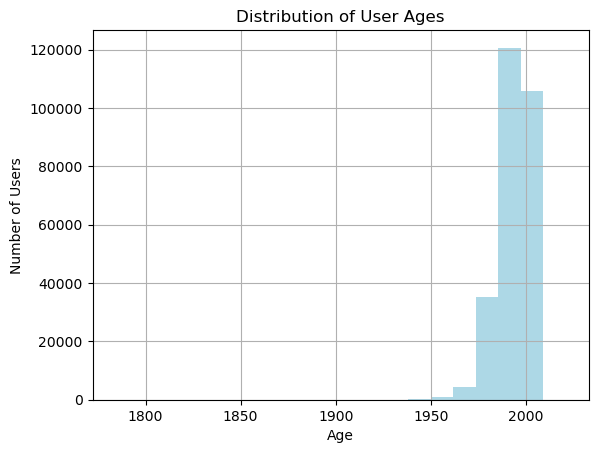

In [29]:
# Display basic statistics
#print(users['Age'].describe())
import matplotlib.pyplot as plt
books['yearOfPublication'].describe()
# Plot a histogram
plt.hist(books['yearOfPublication'].dropna(), bins=20, color='lightblue')
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

In [26]:
missing_year = books.loc[books['yearOfPublication'] < 1500]
books.at[missing_year.index[0], 'yearOfPublication'] = 1784
books.at[missing_year.index[1], 'yearOfPublication'] = 1985
books.at[missing_year.index[2], 'yearOfPublication'] = 1998
books.at[missing_year.index[3], 'yearOfPublication'] = 1954
books.at[missing_year.index[4], 'yearOfPublication'] = 1988
books.at[missing_year.index[5], 'yearOfPublication'] = 1975
books.at[missing_year.index[6], 'yearOfPublication'] = 1932
books.at[missing_year.index[7], 'yearOfPublication'] = 1943
books.at[missing_year.index[8], 'yearOfPublication'] = 1912

import numpy as np
# Set year '0' to NaN
books.loc[books['yearOfPublication'] == 0, 'yearOfPublication'] = np.nan

# Set future years to NaN
books.loc[books['yearOfPublication'] > 2023, 'yearOfPublication'] = np.nan

# Set unusually old years to NaN
books.loc[books['yearOfPublication'] < 1500, 'yearOfPublication'] = np.nan


In [30]:
# Drop the rows where 'yearOfPublication' is NaN
books = books.dropna(subset=['yearOfPublication'])

# Make sure to convert the 'yearOfPublication' to integer type
books['yearOfPublication'] = books['yearOfPublication'].astype(int)

In [34]:
# Create a condition where bookRating is not equal to 0
condition = ratings['bookRating'] != 0

# Use the condition to filter the Ratings dataframe
ratings = ratings[condition]

# Let's verify that it worked
print(ratings['bookRating'].unique())

[ 5  3  6  8  7 10  9  4  1  2]


## Feature Engineering and Data Transformation

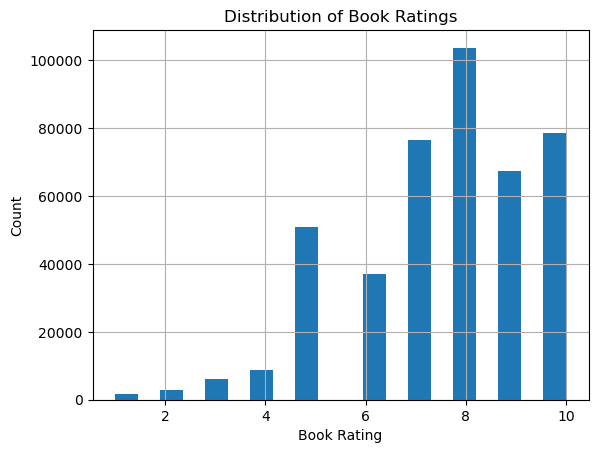

In [35]:
import matplotlib.pyplot as plt

# Plot a histogram of 'bookRating'
ratings['bookRating'].hist(bins=20)
plt.xlabel('Book Rating')
plt.ylabel('Count')
plt.title('Distribution of Book Ratings')
plt.show()

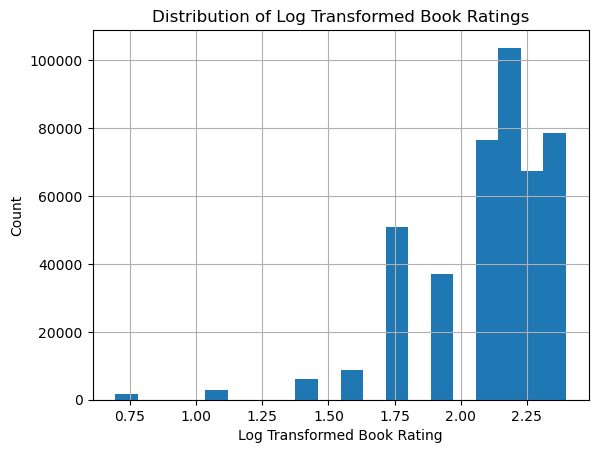

In [36]:
import numpy as np

# Apply a log transformation to 'bookRating'
ratings['bookRating'] = np.log1p(ratings['bookRating'])

# Check the new distribution
ratings['bookRating'].hist(bins=20)
plt.xlabel('Log Transformed Book Rating')
plt.ylabel('Count')
plt.title('Distribution of Log Transformed Book Ratings')
plt.show()


In [44]:
# Count of how many items a user has interacted with
user_interactions = ratings.groupby('userID')['ISBN'].count().reset_index().rename(columns={'ISBN':'userInteractionCount'})

# Count of how many users have interacted with an item
book_interactions = ratings.groupby('ISBN')['userID'].count().reset_index().rename(columns={'userID':'bookInteractionCount'})

# Merge these features into the Ratings dataframe
ratings_usr = pd.merge(ratings, user_interactions, on='userID')
ratings_usr = pd.merge(ratings_usr, book_interactions, on='ISBN')

In [46]:
# Save the DataFrames to CSV files
users.to_csv('../data/processed/users_cleaned.csv', index=False)
books.to_csv('../data/processed/books_cleaned.csv', index=False)
ratings.to_csv('../data/processed/ratings_cleaned.csv', index=False)
ratings_usr.to_csv('../data/processed/ratings_cleaned_engineered.csv', index=False)